# toad segmentation using Fully conntectd CNN

Our task is to build a CNN model to segment the road from the given image 

#  Original image

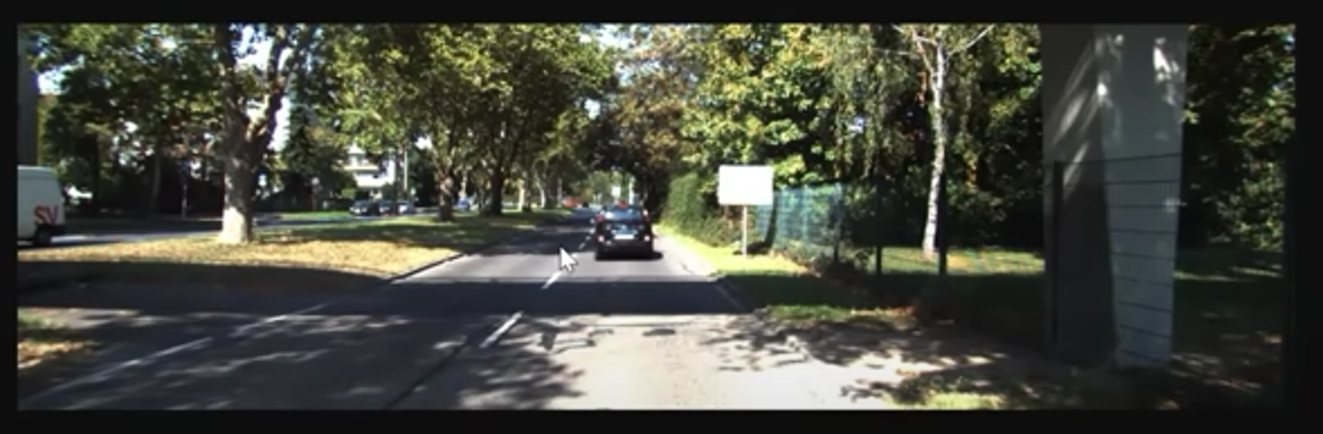

# segmented image 

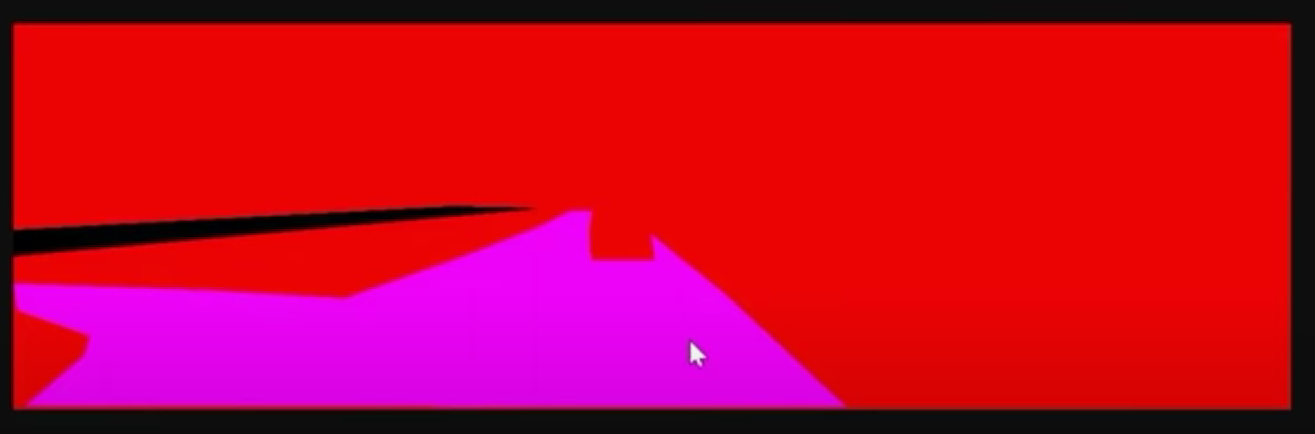

1) upsampling the image- given an original image if we upsample the image 2x it will increase the height of original image by 2 and same goes for width  

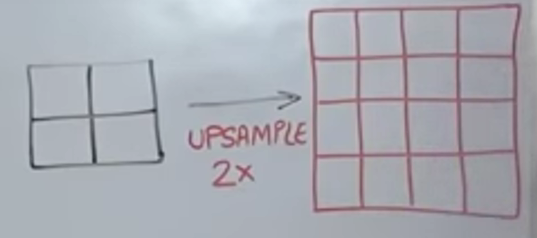

after upsampling our image our next task is to decied how to fill the newly added matrix, here are the few technique to fiil the matrix

1.1) bed of nails- we take the value from the original image and add it to one of the nearted neighbour cell and assing all the other neighbour cells as zero. one problem with this algo is that is that there will be a lot of zeroes in the upsampled image

1.2) nearest neighbour method- we assign the same value to all the new matrix cell with respect to the original cell at the nearest location. eg: for the new image the values will be same for the first to column cell in first row and in first column of seond row and it will be equal to the 1st cell value of original image

1.3)bilinear interpolation- in interpolation we perform a logic of backprpogation by taking the upscale image as input and predicting the pixel values for the image on the left

1.4) transpose convolution- we define a learnable filter with some weight and bias and use this filter to assign the weight values for the new cells of upsampled image, when we pass the image to netowrk for learning we will also pass the wrigth of the filter so that the network can learn the parameters for the filter as well


2) articture of fully connected CNN

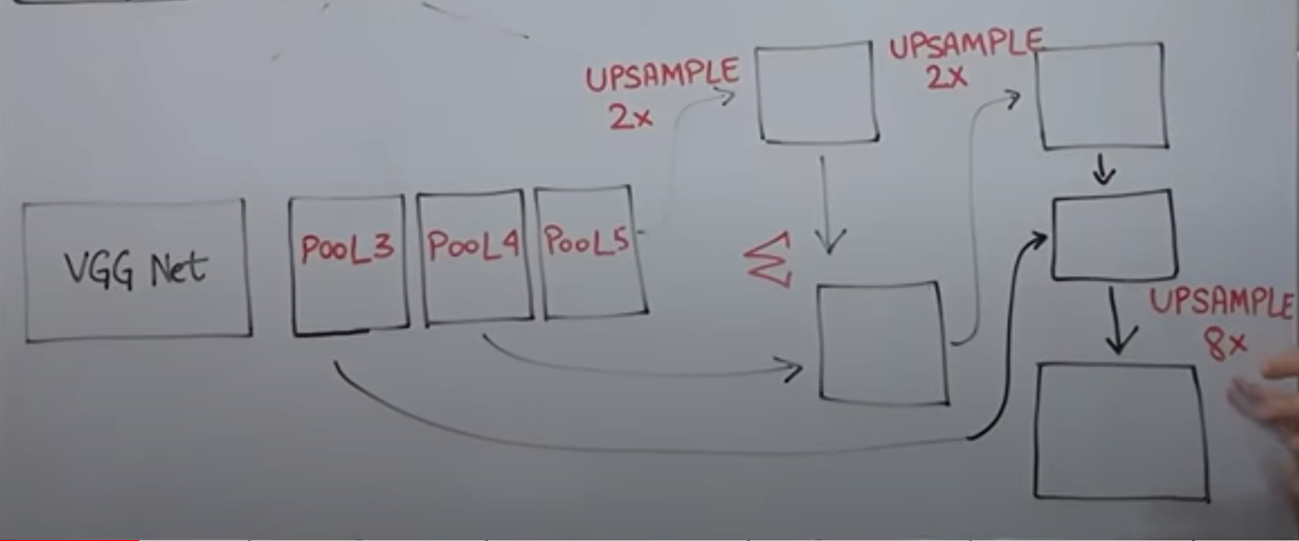

vgg net image classification net-we use this to classifiy various entites in out network eg: if we have human, car and dog in out image we encode this classed and they are used in the output of classigication model - The VGG net takes in a image and output a number for a paticular class. we need to make some changes to our network to allow it to output a segmented image of same dimensions

vgg network has various convolution blocks placed sequetially to each other, each convoltional block has 2 convolutinal layer and a max pool layer,

we extract the output from the last 3 convolutional blocks that is the pool3, pool4, pool5  

we first upsample the pool5 output, the add this upsampled image to output of pool4, we again upsample the image 2 times and again add the output from the pool3 layer, finally we upsample the image 8 times. finally we have our segmentaion mask

by combining the output of pool layers we are combining the output of the different blocks into 1 image

as we perform a final upscale of 8 times so this articture is know as FCN8


Fully Convolutional Neural Networks- dataset and code at kaggle -
https://www.kaggle.com/code/sakshaymahna/fully-convolutional-network

# 2d-object detection using YOLO

the yolo algo can be divided into 3 parts
1) anchor box
2) intersection over union
3) bounding box prediction

we pass an image to cnn and we get a 19 19 matrix. 

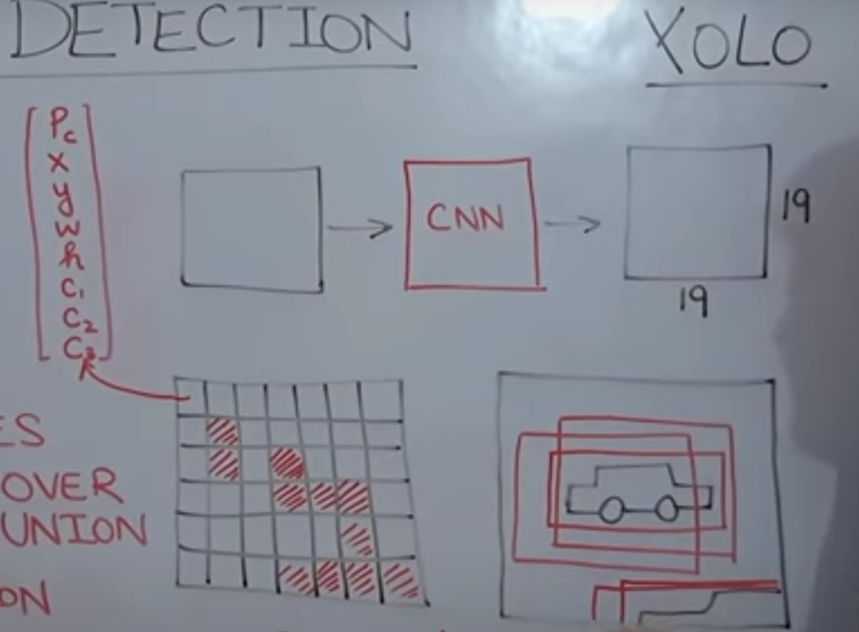

for each of the cell of 19*19, we will have a vector(feature vector) a shown above, the value Pc tell us if there is any informative information is present in that cell, if pc is 1 then x and y give postion of that paticular cell, w and h describe the widht and heigh of the cell, the other labels c1,c2,c3 are binary label that descirbe the precense of the paticular class in that cell, 

for the paticular car shown above, we have multiple bounding box generated by 19*19 matrix, we also calcuate the probablity how confident the output of the bounding box prediction is, here the outer box will have a lower value of probablity and the inerr will have higher value of probablity.

to seperate all the intersecting boxes and get a single box for a paticular class, we use the intersection over union (IOU) method, the method of seperating and getting one buonding box is known as non maximum supression, 

1) IOU- used to computer how different are two bounding boxes, this is done as follow. if we have two bounding boxes, we first calculate their intersection and then divide that by their union, this gives us messure of how two bounding box are simillar: 

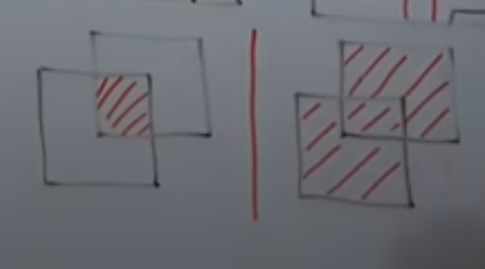


we calculate IOU of a box with respect to the box with maximum probablity, assuming the the image most inisde has the highest probablity score, then we calculate the probablity score for the other bounding boxes, with respect to this bounding box, 

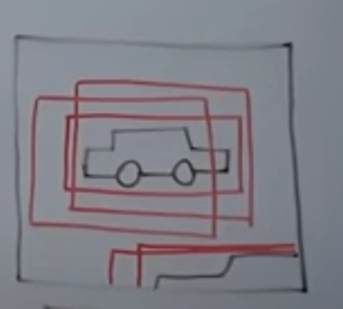

as we perform the IOU we observe that the box inside the inner most has highest iou followed by second highest for the seond inside box, so we discard the other boxes present and conclude that the two box represent the same object

having a lower iou value indicate that that box represent some other object/class


2) anchor boxes, in case a pixel represent two or more class in a single pixcel, say two car parked side by side, then to deal with such situation we use anchor boxes, anchor box represent the rought shape for a paticular class detection, this boxes can be designed by us or other machine leraning algorithm, 

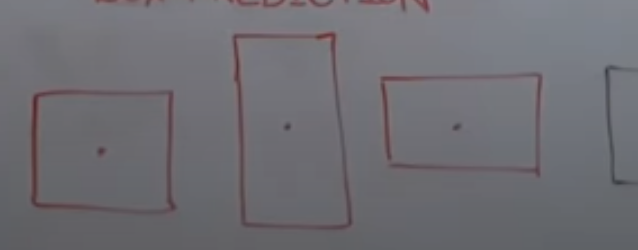


lets say we have three anchor boxes which represent 3 different classes, one with more height, other with more widht and other with same hieght and widht, now for each cell we will have the feature vecore as described above not once but threee times(as we have three anchor boxes), this will enable us to predict multiple classes in the same pixcel, 

the above discussed technique combinedly give us the YOLO algorithm.

https://github.com/experiencor/keras-yolo3

https://www.kaggle.com/code/sakshaymahna/yolov3-keras-2d-object-detection/notebook

# Object tracking